In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [11]:
import os
import math
from ast import literal_eval
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

from SSMuLA.fitness_process_vis import parse_lib_stat
from SSMuLA.de_simulations import DE_COLORS, DE_TYPES, DE_LEGEND_MAP
from SSMuLA.vis import FZL_PALETTE, LIB_COLORS
from SSMuLA.alde_analysis import avg_alde_df
from SSMuLA.zs_analysis import (
    ZS_OPTS,
    ZS_COMB_OPTS,
    ZS_OPTS_LEGEND,
)
from SSMuLA.landscape_global import LIB_INFO_DICT

%matplotlib inline

In [12]:
N_SAMPLE_LIST = [24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
TOTAL_N_LIST = [n + 96 for n in N_SAMPLE_LIST]

In [13]:
lib_stat = parse_lib_stat(
    lib_csv_path="results/fitness_distribution/max/all_lib_stats.csv", n_mut_cuttoff=0
)
lib_stat

,lib,n_mut_cuttoff,n_site,numb_measured,percent_measured,numb_active,percent_active,active_fit_min,parent_fit,parent_rank,...,scale,peaks,peak_kde,percentiles,pdf_values,parent_rank_percent,Q1,Q2,Q3,numb_kde_peak
0,DHFR,0,3.0,8000.0,100.000000,854.0,10.675000,0.158614,0.231325,602.0,...,1.737006e-03,"[0.1275662158236592, 0.5084256342965795, 0.606...","[18.95715826406059, 0.17704519880582167, 0.098...","[0.1151661417338432, 0.1212571134074551, 0.122...","[15.199742695395578, 15.667091596432273, 16.11...",0.075250,0.125979,0.127567,0.129802,7
3,ParD2,0,3.0,7882.0,98.525000,6533.0,82.885055,0.000087,0.973896,12.0,...,1.099060e-01,"[0.03337870027347259, 0.6106664209434821, 0.85...","[2.870133679609529, 0.40012326949250876, 0.421...","[-0.2192609576095971, -0.11180451121954202, -0...","[0.026974121384613872, 0.028121215058096317, 0...",0.001522,0.023743,0.112118,0.374642,3
6,ParD3,0,3.0,7882.0,98.525000,7248.0,91.956356,0.000485,0.982799,7.0,...,1.567318e-01,"[0.12255350949782506, 0.2818697911295817, 0.89...","[1.5849621685610578, 1.5168268815479706, 0.556...","[-0.2057345859857947, -0.0879267691331092, -0....","[0.01869666257662742, 0.01949003646085834, 0.0...",0.000888,0.112217,0.276349,0.470212,3
9,GB1,0,4.0,149361.0,93.350625,34545.0,23.128528,0.001141,0.114130,3644.0,...,2.786774e-04,"[0.001001001001001001, 0.15015015015015015, 0....","[84.94812751924495, 0.14711297529110418, 0.091...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[84.45520645025827, 84.94812751924495, 80.8935...",0.024397,0.000156,0.000386,0.001026,33
12,T7,0,3.0,6725.0,84.062500,234.0,3.479554,0.176534,0.288006,163.0,...,3.213795e-20,"[0.12212212212212212, 0.22022022022022023, 0.2...","[0.1355385385042058, 0.10759849737430795, 0.09...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[25.89058161801743, 25.83678275907177, 25.6612...",0.024238,0.000000,0.000000,0.000000,11
15,TEV,0,4.0,159132.0,99.457500,18262.0,11.476007,0.035601,0.295036,665.0,...,1.890048e-02,"[-0.7917824701915064, -0.7605090595208127, -0....","[0.0036245994071766735, 0.0021495792852726805,...","[-0.8377727800013499, -0.26246975122161975, -0...","[0.13783458085674552, 0.1361875808265587, 0.12...",0.004179,-0.030314,-0.011234,0.008629,27
18,TrpB3A,0,3.0,7971.0,99.637500,59.0,0.740183,0.097444,1.000000,1.0,...,2.442504e-02,"[-0.3944951616078841, -0.3170232081852239, -0....","[0.005954476272084834, 0.020369915569709816, 0...","[-0.5794792136579096, -0.159409524561979, -0.1...","[0.005958068940422161, 0.005853464928384218, 0...",0.000125,-0.066102,-0.039751,-0.013193,9
21,TrpB3B,0,3.0,7996.0,99.950000,18.0,0.225113,0.086085,1.000000,1.0,...,1.793460e-02,"[-0.3315353103440577, -0.25764490240877025, -0...","[0.00787295674657887, 0.017643469342674266, 0....","[-0.5064595413745341, -0.14947773198508532, -0...","[0.00789062638682396, 0.007669391706426372, 0....",0.000125,-0.074532,-0.055559,-0.036157,8
24,TrpB3C,0,3.0,7994.0,99.925000,35.0,0.437828,0.207105,1.000000,1.0,...,4.350006e-02,"[-0.7129431024521451, -0.676881142400521, -0.4...","[0.0036129353359320897, 0.003617641013231226, ...","[-0.8012949045786242, -0.3009295839772114, -0....","[0.0035276345242041393, 0.003499097774177849, ...",0.000125,-0.120727,-0.073272,-0.026945,8
27,TrpB3D,0,3.0,7763.0,97.037500,719.0,9.261883,0.078985,0.820029,10.0,...,2.078814e-02,"[-0.4327437550162602, -0.3044598574343214, 0.0...","[0.007988036362784934, 0.024487960087067218, 1...","[-0.4399507155545714, -0.11762175754299561, -0...","[0.007441392159327368, 0.007659122367135711, 0...",0.001288,-0.014157,0.005591,0.030403,13


In [14]:
mlde_all = pd.read_csv("results/mlde/all_df_comb_onehot_5.csv")
de_all = pd.read_csv("results/de/DE-active/scale2max/all_landscape_de_summary.csv")

In [15]:
mlde_all

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,192,4000,0,0.935697,0.153123,1.000000,0.409558,0.892434,0.437613,1.0,199.0,all,DHFR,Triad-esm_score,384,max
1,one-hot,boosting,192,4000,1,0.813921,0.164246,1.000000,0.455075,0.928627,0.482690,1.0,88.0,all,DHFR,Triad-esm_score,384,max
2,one-hot,boosting,192,4000,2,0.798997,0.163849,1.000000,0.490490,0.931763,0.446393,1.0,82.0,all,DHFR,Triad-esm_score,384,max
3,one-hot,boosting,192,4000,3,0.997845,0.157741,1.000000,0.484294,0.928540,0.406754,1.0,0.0,all,DHFR,Triad-esm_score,384,max
4,one-hot,boosting,192,4000,4,0.752007,0.146420,0.865538,0.456413,0.913301,0.445943,0.0,520.0,all,DHFR,Triad-esm_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503295,one-hot,ridge,1920,1000,45,0.240007,-0.111016,1.000000,0.127856,0.991128,0.146828,1.0,0.0,all,TrpB3F,two-best_score,96,max
2503296,one-hot,ridge,1920,1000,46,0.236282,-0.109945,1.000000,0.128184,0.991138,0.147085,1.0,0.0,all,TrpB3F,two-best_score,96,max
2503297,one-hot,ridge,1920,1000,47,0.230166,-0.108016,1.000000,0.128184,0.991151,0.146906,1.0,0.0,all,TrpB3F,two-best_score,96,max
2503298,one-hot,ridge,1920,1000,48,0.232831,-0.108025,1.000000,0.128135,0.991120,0.146248,1.0,0.0,all,TrpB3F,two-best_score,96,max


In [16]:
active_cutoff = 1
active_lib_list = lib_stat[(lib_stat["percent_active"]>=active_cutoff)]["lib"].tolist() # & (lib_stat["percent_measured"]>90)
active_lib_list

['DHFR',
 'ParD2',
 'ParD3',
 'GB1',
 'T7',
 'TEV',
 'TrpB3D',
 'TrpB3E',
 'TrpB3F',
 'TrpB3G',
 'TrpB3I',
 'TrpB4']

In [17]:
FTLIB_FRAC_LIST = [0.125, 0.25, 0.5, 1]

In [18]:

def get_mlde_avg_sdf(
    mlde_all: pd.DataFrame,
    n_top: int,
    n_mut_cutoff: str,
    zs: str,
    active_lib_list: list,
    model_list: list = ["boosting"],
    ft_frac: float = 0.125,
):
    """
    Get the average MLDE for a given set of libraries, zs values, and ft_frac

    Args:
    - mlde_all, pd.DataFrame: DataFrame containing all MLDE data
    - n_top, int: Number of top mutations to consider
    - n_mut_cutoff, str: Mutation cutoff to consider
    - zs, str: ZS value to consider
    - active_lib_list, list: List of active libraries to consider
    - model_list, list: List of models to consider
    - ft_frac, float: fraction of the focused training set
    """

    slice_mlde = mlde_all[
        (mlde_all["lib"].isin(active_lib_list))
        & (mlde_all["zs"] == zs)
        & (mlde_all["n_top"] == n_top)
        & (mlde_all["n_mut_cutoff"] == n_mut_cutoff)
        & (mlde_all["rep"].isin(np.arange(50)))
        & (mlde_all["model"].isin(model_list))
    ]

    if zs != "none":
        lib_dfs = []
        for lib in active_lib_list:
            lib_df = slice_mlde[slice_mlde["lib"] == lib].copy()

            n_site = len(LIB_INFO_DICT[lib]["positions"])

            if n_mut_cutoff == "all":
                sample_space = 20 ** n_site
            elif n_mut_cutoff == "double":
                sample_space = math.comb(n_site, 2) * 20 ** 2
            elif n_mut_cutoff == "single":
                sample_space = n_site * 20

            ft_lib_unique = np.array(sorted(lib_df["ft_lib"].unique()))
            ft_lib_frac = ft_lib_unique / sample_space

            lib_df["ft_lib_size"] = lib_df["ft_lib"].map(
                {numb: frac for numb, frac in zip(ft_lib_unique, ft_lib_frac)}
            )

            lib_dfs.append(lib_df[lib_df["ft_lib_size"] == ft_frac])
        slice_mlde = pd.concat(lib_dfs)

    avg_mlde = (
        slice_mlde[["n_sample", "top_maxes", "if_truemaxs"]]
        .groupby("n_sample")
        .agg(["mean", "std"])
        .reset_index()
    )
    avg_mlde.columns = ["{}_{}".format(i, j) for i, j in avg_mlde.columns]
    avg_mlde = avg_mlde.rename(columns={"n_sample_": "n_sample"}).set_index("n_sample")
    return avg_mlde


In [19]:
n_top = 96
avg_mlde_df_dict = {}

# just mlde
avg_mlde_df_dict["MLDE"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="all", zs="none", active_lib_list=active_lib_list, ft_frac=0.125
)
avg_mlde_df_dict["ftMLDE: Hamming distance"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="double", zs="none", active_lib_list=active_lib_list, ft_frac=0.125
)

for zs in ZS_OPTS[1:]:
    avg_mlde_df_dict[f"ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_sdf(
        mlde_all, n_top, n_mut_cutoff="all", zs=zs, active_lib_list=active_lib_list, ft_frac=0.125
    )

In [20]:
de_avg = (
    de_all[de_all["lib"].isin(active_lib_list)][["de_type", "mean_all", "fraction_max"]]
    .groupby("de_type")
    .agg(["mean", "std"])
)
de_avg.columns = ["{}_{}".format(i, j) for i, j in de_avg.columns]
de_avg = de_avg.rename(columns={"de_type_": "de_type"})
de_avg

,mean_all_mean,mean_all_std,fraction_max_mean,fraction_max_std
de_type,,,,
recomb_SSM,0.614846,0.237674,0.107207,0.134063
single_step_DE,0.672176,0.224364,0.224935,0.190742
top96_SSM,0.748514,0.229485,0.351371,0.286490


In [21]:
list(avg_mlde_df_dict.keys())[1:7]

['ftMLDE: Hamming distance',
 'ftMLDE: EVmutation',
 'ftMLDE: ESM',
 'ftMLDE: ESM-IF',
 'ftMLDE: CoVES',
 'ftMLDE: Triad']

In [22]:
avg_mlde_df_dict["Average ftMLDE"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[1:7]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [23]:
for eq_n in [1, 2, 3, 4]:

    avg_mlde_df_dict[f"ALDE x {eq_n}"] = avg_alde_df(
        eq_n, active_lib_list, alde_model="Boosting Ensemble"
    )

In [24]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 4"] = avg_alde_df(
        eq_n=4, lib_list = active_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [25]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 3"] = avg_alde_df(
        eq_n=3, lib_list = active_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [26]:
for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
    zs_label = ZS_OPTS_LEGEND[zs+"_score"]
    avg_mlde_df_dict[f"{zs_label} ALDE x 2"] = avg_alde_df(
        eq_n=2, lib_list = active_lib_list, zs=zs, alde_model="Boosting Ensemble"
    )

In [27]:
list(avg_mlde_df_dict.keys())[12:12+6]

['ESM-IF ALDE x 4',
 'EVmutation ALDE x 4',
 'CoVES ALDE x 4',
 'Hamming distance ALDE x 4',
 'ESM ALDE x 4',
 'Triad ALDE x 4']

In [28]:
avg_mlde_df_dict["Average ftALDE x 4"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12:12+6]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [29]:
list(avg_mlde_df_dict.keys())[12+6:12+6+6]

['ESM-IF ALDE x 3',
 'EVmutation ALDE x 3',
 'CoVES ALDE x 3',
 'Hamming distance ALDE x 3',
 'ESM ALDE x 3',
 'Triad ALDE x 3']

In [30]:
avg_mlde_df_dict["Average ftALDE x 3"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12+6:12+6+6]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [31]:
list(avg_mlde_df_dict.keys())[12+6*2:12+6*2+6]

['ESM-IF ALDE x 2',
 'EVmutation ALDE x 2',
 'CoVES ALDE x 2',
 'Hamming distance ALDE x 2',
 'ESM ALDE x 2',
 'Triad ALDE x 2']

In [32]:
avg_mlde_df_dict["Average ftALDE x 2"] = pd.DataFrame(
    np.mean(np.stack(list(avg_mlde_df_dict.values())[12+6*2:12+6*2+6]), axis=0),
    columns=avg_mlde_df_dict["MLDE"].columns,
    index=N_SAMPLE_LIST,
)

In [33]:
for n in [2, 3, 4]:

    for zs in ["esmif", "ev", "coves", "ed", "esm", "Triad"]:
        zs_label = ZS_OPTS_LEGEND[zs+"_score"]
        avg_mlde_df_dict[f"ds-{zs_label} ALDE x {str(n)}"] = avg_alde_df(
            eq_n=n, lib_list = active_lib_list, zs="ds-"+zs, alde_model="Boosting Ensemble"
        )

In [34]:
import seaborn as sns

In [35]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [36]:
avg_mlde_df_dict.keys()

dict_keys(['MLDE', 'ftMLDE: Hamming distance', 'ftMLDE: EVmutation', 'ftMLDE: ESM', 'ftMLDE: ESM-IF', 'ftMLDE: CoVES', 'ftMLDE: Triad', 'Average ftMLDE', 'ALDE x 1', 'ALDE x 2', 'ALDE x 3', 'ALDE x 4', 'ESM-IF ALDE x 4', 'EVmutation ALDE x 4', 'CoVES ALDE x 4', 'Hamming distance ALDE x 4', 'ESM ALDE x 4', 'Triad ALDE x 4', 'ESM-IF ALDE x 3', 'EVmutation ALDE x 3', 'CoVES ALDE x 3', 'Hamming distance ALDE x 3', 'ESM ALDE x 3', 'Triad ALDE x 3', 'ESM-IF ALDE x 2', 'EVmutation ALDE x 2', 'CoVES ALDE x 2', 'Hamming distance ALDE x 2', 'ESM ALDE x 2', 'Triad ALDE x 2', 'Average ftALDE x 4', 'Average ftALDE x 3', 'Average ftALDE x 2', 'ds-ESM-IF ALDE x 2', 'ds-EVmutation ALDE x 2', 'ds-CoVES ALDE x 2', 'ds-Hamming distance ALDE x 2', 'ds-ESM ALDE x 2', 'ds-Triad ALDE x 2', 'ds-ESM-IF ALDE x 3', 'ds-EVmutation ALDE x 3', 'ds-CoVES ALDE x 3', 'ds-Hamming distance ALDE x 3', 'ds-ESM ALDE x 3', 'ds-Triad ALDE x 3', 'ds-ESM-IF ALDE x 4', 'ds-EVmutation ALDE x 4', 'ds-CoVES ALDE x 4', 'ds-Hamming 

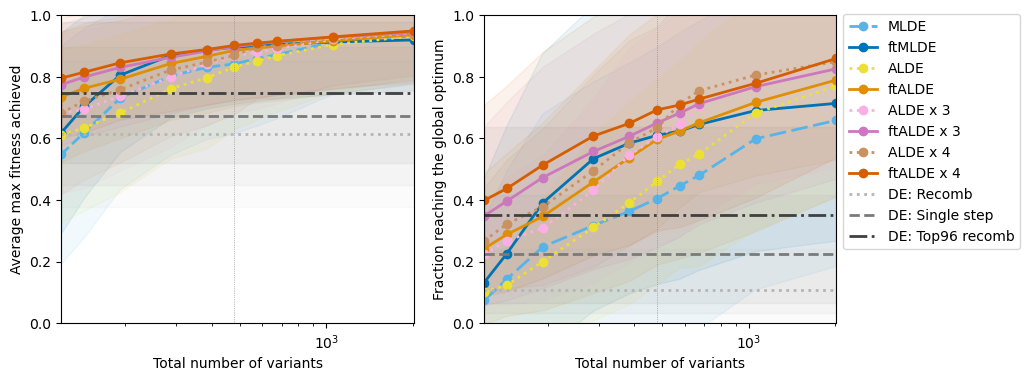

In [38]:
# for avg cross number of samples
n_top = 96
n_corr = 384

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
mlde_color_list = [
    sns.color_palette("colorblind")[9],
    sns.color_palette("colorblind")[0],
    sns.color_palette("colorblind")[8],
    sns.color_palette("colorblind")[1],
    sns.color_palette("colorblind")[6],
    sns.color_palette("colorblind")[4],
    sns.color_palette("colorblind")[5],
    sns.color_palette("colorblind")[3],
    # *sns.color_palette("colorblind")[:]

]
line_styles = ["dashed", "solid", "dotted", "solid", "dotted", "solid", "dotted", "solid"]

for ax, mlde_metric, de_metric, y_label in zip(
    axes,
    ["top_maxes", "if_truemaxs"],
    ["mean_all", "fraction_max"],
    ["Average max fitness achieved", "Fraction reaching the global optimum"],
):

    for i, (mlde_opts) in enumerate(
        [
            "MLDE",
            "Average ftMLDE",
            # "ALDE x 1",
            "ALDE x 2",
            "Average ftALDE x 2",
            "ALDE x 3",
            "Average ftALDE x 3",
            "ALDE x 4",
            "Average ftALDE x 4",
        ]
    ):
        mlde_df = avg_mlde_df_dict[mlde_opts]

        ax.plot(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"],
            # label=label_app+mlde_opts,
            label=mlde_opts.replace("Average ", "").replace(" x 2", ""),
            marker="o",
            linestyle=line_styles[i],
            linewidth=2,
            # color=FZL_PALETTE[mlde_color_list[i]],
            color=mlde_color_list[i]
        )
        ax.fill_between(
            # mlde_df.index,
            # mlde_df["n_sample"],
            TOTAL_N_LIST,
            mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
            mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
            # color=FZL_PALETTE[mlde_color_list[i]],
            color=mlde_color_list[i],
            alpha=0.08,
        )

    de_colors = sns.color_palette("Greys", 4)
    de_ls = ["dotted", "dashed", "dashdot"]

    for d, de in enumerate(DE_TYPES):
        ax.axhline(
            de_avg.loc[de, f"{de_metric}_mean"],
            label=f"DE: {DE_LEGEND_MAP[de]}",
            color=de_colors[d+1],
            linestyle=de_ls[d],
            linewidth=2,
        )
        ax.fill_between(
            TOTAL_N_LIST,  # N_SAMPLE_LIST,
            de_avg.loc[de, f"{de_metric}_mean"] - de_avg.loc[de, f"{de_metric}_std"],
            de_avg.loc[de, f"{de_metric}_mean"] + de_avg.loc[de, f"{de_metric}_std"],
            color=de_colors[d+1],
            alpha=0.05,
        )

    # add vline
    ax.axvline(n_corr+n_top, color="gray", linewidth=0.5, linestyle="dotted")

    # ax.set_xlim(N_SAMPLE_LIST[0], N_SAMPLE_LIST[-1])
    ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
    ax.set_ylim(0, 1.0)

    ax.set_xscale("log")
    # ax.set_xlabel("Number of training samples")
    ax.set_xlabel("Total number of variants")
    ax.set_ylabel(y_label)

    if ax == axes[1]:
        # adjust the first legend linestyle 
        handles, labels = ax.get_legend_handles_labels()
        handles[0].set_dashes([6, 2])
        ax.legend(loc="upper left", bbox_to_anchor=(1, 1.025))
# fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig2a.svg", dpi=300, bbox_inches="tight", format='svg')

In [32]:
(avg_mlde_df_dict["Average ftMLDE"]["top_maxes_mean"] - de_avg.loc["recomb_SSM", "mean_all_mean"])/de_avg.loc["recomb_SSM", "mean_all_mean"]*100

24       3.002317
48      15.845183
96      30.340831
192     40.159631
288     42.906603
384     44.397452
480     45.142063
576     45.990741
960     47.274870
1920    48.434153
Name: top_maxes_mean, dtype: float64

In [33]:
(avg_mlde_df_dict["Average ftMLDE"]["top_maxes_mean"] - de_avg.loc["single_step_DE", "fraction_max_mean"])/de_avg.loc["single_step_DE", "fraction_max_mean"]*100

24      181.550936
48      216.656173
96      256.279196
192     283.118327
288     290.627016
384     294.702167
480     296.737518
576     299.057331
960     302.567422
1920    305.736256
Name: top_maxes_mean, dtype: float64

In [34]:
(avg_mlde_df_dict["Average ftMLDE"]["if_truemaxs_mean"] - de_avg.loc["top96_SSM", "mean_all_mean"])/de_avg.loc["top96_SSM", "mean_all_mean"]*100

24     -82.669370
48     -70.868212
96     -51.051174
192    -32.867001
288    -26.224211
384    -22.698708
480    -20.806070
576    -17.614562
960    -11.231546
1920    -7.854485
Name: if_truemaxs_mean, dtype: float64

In [35]:
(avg_mlde_df_dict["Average ftMLDE"]-avg_mlde_df_dict["MLDE"])/avg_mlde_df_dict["MLDE"]*100

,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
24,10.407046,-8.495876,76.893939,27.496642
48,11.846060,-13.172615,55.753968,17.674383
96,8.995170,-14.429508,60.462287,13.791383
192,7.858150,-19.095395,75.290698,9.786896
288,6.545168,-16.760751,63.218391,4.335725
384,6.097356,-16.684822,54.296296,1.220369
480,5.110876,-17.027361,44.579946,-0.972453
576,4.096125,-15.153619,39.097744,-3.161588
960,0.126047,1.825314,17.600787,-5.773971
1920,-1.604609,7.356653,9.479718,-5.277163


In [36]:
(avg_mlde_df_dict["ALDE x 3"]-avg_mlde_df_dict["ALDE x 2"])/avg_mlde_df_dict["ALDE x 2"]*100

,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
n_sample,,,,
24.0,11.874574,-8.004546,119.642857,56.221816
48.0,9.308876,-4.761224,116.176471,62.358839
96.0,8.096761,-5.635006,54.545455,13.998057
192.0,4.918367,-0.080261,38.596491,-0.661025
288.0,5.532661,-13.964332,39.534884,6.124626
384.0,4.202527,-9.122484,31.620553,5.907891
480.0,3.424802,-2.462454,25.000000,9.140511
576.0,2.661866,-2.366480,28.145695,-1.141252
960.0,1.972464,-3.079925,15.200000,-11.386016


In [38]:
list(avg_mlde_df_dict.keys())

['MLDE',
 'ftMLDE: Hamming distance',
 'ftMLDE: EVmutation',
 'ftMLDE: ESM',
 'ftMLDE: ESM-IF',
 'ftMLDE: CoVES',
 'ftMLDE: Triad',
 'Average ftMLDE',
 'ALDE x 1',
 'ALDE x 2',
 'ALDE x 3',
 'ALDE x 4',
 'ESM-IF ALDE x 4',
 'EVmutation ALDE x 4',
 'CoVES ALDE x 4',
 'Hamming distance ALDE x 4',
 'ESM ALDE x 4',
 'Triad ALDE x 4',
 'ESM-IF ALDE x 3',
 'EVmutation ALDE x 3',
 'CoVES ALDE x 3',
 'Hamming distance ALDE x 3',
 'ESM ALDE x 3',
 'Triad ALDE x 3',
 'ESM-IF ALDE x 2',
 'EVmutation ALDE x 2',
 'CoVES ALDE x 2',
 'Hamming distance ALDE x 2',
 'ESM ALDE x 2',
 'Triad ALDE x 2',
 'Average ftALDE x 4',
 'Average ftALDE x 3',
 'Average ftALDE x 2',
 'ds-ESM-IF ALDE x 2',
 'ds-EVmutation ALDE x 2',
 'ds-CoVES ALDE x 2',
 'ds-Hamming distance ALDE x 2',
 'ds-ESM ALDE x 2',
 'ds-Triad ALDE x 2',
 'ds-ESM-IF ALDE x 3',
 'ds-EVmutation ALDE x 3',
 'ds-CoVES ALDE x 3',
 'ds-Hamming distance ALDE x 3',
 'ds-ESM ALDE x 3',
 'ds-Triad ALDE x 3',
 'ds-ESM-IF ALDE x 4',
 'ds-EVmutation ALDE x 4

In [39]:
# add double site
for zs in ZS_OPTS[1:]:
    avg_mlde_df_dict[f"ds-ftMLDE: {ZS_OPTS_LEGEND[zs]}"] = get_mlde_avg_sdf(
        mlde_all, n_top, n_mut_cutoff="double", zs=zs, active_lib_list=active_lib_list, ft_frac=0.125
    )

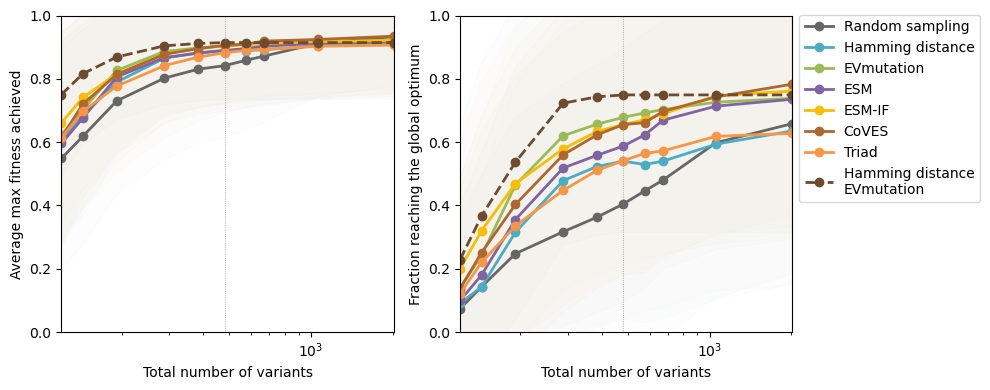

In [40]:
# Define constants
n_top = 96
n_corr = 384

fig, axes = plt.subplots(
    1, 2, figsize=(10, 4), sharex=True
)  # Create a 2x2 grid of subplots
mlde_color_list = ["gray", "blue", "green", "purple", "yellow", "brown", "orange", "dark_brown"]

# Define the data and labels for MLDE and ALDE cases
options_dict = {
    "MLDE": [
        "MLDE",
        "ftMLDE: Hamming distance",
        "ftMLDE: EVmutation",
        "ftMLDE: ESM",
        "ftMLDE: ESM-IF",
        "ftMLDE: CoVES",
        "ftMLDE: Triad",
        "ds-ftMLDE: EVmutation"
    ]
}

marker_styles = ["o"]
line_styles = ["solid"] * 7 + ["dashed"]
y_labels = ["Average max fitness achieved", "Fraction reaching the global optimum"]


# Loop over both MLDE and ALDE data in the first and second rows respectively
for row, (method, options) in enumerate(options_dict.items()):
    for ax, mlde_metric, y_label in zip(
        axes, ["top_maxes", "if_truemaxs"], y_labels
    ):

        for i, mlde_opts in enumerate(options):
            mlde_df = avg_mlde_df_dict[mlde_opts]

            ax.plot(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"],
                label=mlde_opts.replace("Average ", ""),
                marker=marker_styles[row],
                linewidth=2,
                linestyle=line_styles[i],
                color=FZL_PALETTE[
                    mlde_color_list[i % len(mlde_color_list)]
                ],
            )

            ax.fill_between(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
                mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
                color=FZL_PALETTE[
                    mlde_color_list[i % len(mlde_color_list)]
                ],
                alpha=0.01,
            )

        ax.axvline(n_corr + n_top, color="gray", linewidth=0.5, linestyle="dotted")
        ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
        ax.set_ylim(0, 1.0)
        ax.set_xscale("log")
        ax.set_xlabel("Total number of variants")
        ax.set_ylabel(y_label)

# add first legend to be different zs
mlde_color_dict = {
    l.replace("ftMLDE: ", "").replace(
        "MLDE", "Random sampling"
    ).replace("ds-", "Hamming distance\n"): FZL_PALETTE[c]
    for (l, c) in zip(options_dict["MLDE"], mlde_color_list)
}
# Create legend for line colors using the color dictionary
color_handles = [
    Line2D([0], [0], color=color, lw=2, label=label, marker="o", linestyle=line_styles[i])
    for i, (label, color) in enumerate(mlde_color_dict.items())
]
color_handles[-1].set_dashes([6, 2])

# Add the legends to the figure
axes[1].legend(
    handles=color_handles, 
    loc="upper left", bbox_to_anchor=(1, 1.025)
)


# Adjust the layout to prevent overlapping
plt.tight_layout(h_pad=1.5)
plt.show()
# fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig3e.svg", dpi=300, bbox_inches="tight", format='svg')

In [42]:
more_gray_colors = {
    "gray-blue": "#749aa3",
    "gray-orange": "#c58a6c",
    "gray-green": "#8b946e",
    "gray-yellow": "#d6b969",
    "gray-purple": "#897a8f",
    "gray-brown": "#8b6e57",
}

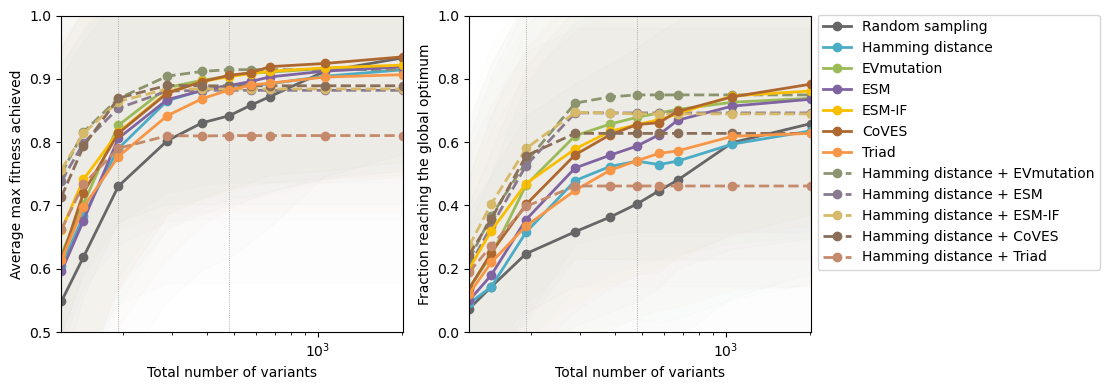

In [43]:
# Define constants
n_top = 96
n_corr = 384

fig, axes = plt.subplots(
    1, 2, figsize=(11.2, 4), sharex=True
)  # Create a 2x2 grid of subplots
mlde_color_list = ["gray", "blue", "green", "purple", "yellow", "brown", "orange"]
gray_list = ["#749aa3", ]
# Define the data and labels for MLDE and ALDE cases
options_dict = {
    "MLDE": [
        "MLDE",
        "ftMLDE: Hamming distance",
        "ftMLDE: EVmutation",
        "ftMLDE: ESM",
        "ftMLDE: ESM-IF",
        "ftMLDE: CoVES",
        "ftMLDE: Triad",
    ]
}


y_labels = ["Average max fitness achieved", "Fraction reaching the global optimum"]
y_mins = [0.5, 0]

# Loop over both MLDE and ALDE data in the first and second rows respectively
for row, (method, options) in enumerate(options_dict.items()):
    for ax, mlde_metric, y_label, y_min in zip(
        axes, ["top_maxes", "if_truemaxs"], y_labels, y_mins
    ):

        for i, mlde_opts in enumerate(options):
            mlde_df = avg_mlde_df_dict[mlde_opts]

            ax.plot(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"],
                label=mlde_opts.replace("Average ", ""),
                marker="o",
                # linestyle="dotted",
                linewidth=2,
                color=FZL_PALETTE[
                    mlde_color_list[i % len(mlde_color_list)]
                ],
            )

            ax.fill_between(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
                mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
                color=FZL_PALETTE[mlde_color_list[i % len(mlde_color_list)]],
                alpha=0.01,
            )
            if i > 1:
                # plot the double site same color but different linestyle and marker
                mlde_df = avg_mlde_df_dict["ds-" + mlde_opts]

                ax.plot(
                    TOTAL_N_LIST,
                    mlde_df[f"{mlde_metric}_mean"],
                    label=mlde_opts.replace("Average ", ""),
                    marker="o",
                    # markersize=7.5,
                    linestyle="dashed",
                    linewidth=2,
                    color=more_gray_colors[
                        "gray-"+mlde_color_list[i % len(mlde_color_list)]
                    ],
                )

                ax.fill_between(
                    TOTAL_N_LIST,
                    mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
                    mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
                    color=more_gray_colors[
                        "gray-"+mlde_color_list[i % len(mlde_color_list)]],
                    alpha=0.01,
                )

        ax.axvline(n_corr + n_top, color="gray", linewidth=0.5, linestyle="dotted")
        ax.axvline(96 + n_top, color="gray", linewidth=0.5, linestyle="dotted")
        ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
        ax.set_ylim(y_min, 1.0)
        ax.set_xscale("log")
        ax.set_xlabel("Total number of variants")
        ax.set_ylabel(y_label)


# add first legend to be different zs
mlde_color_dict = {
    l.replace("ftMLDE: ", "").replace(
        "MLDE", "Random sampling"
    ): FZL_PALETTE[c]
    for (l, c) in zip(options_dict["MLDE"], mlde_color_list)
}
ds_color_dict = {
    l.replace("ftMLDE: ", "Hamming distance + "
    ): more_gray_colors["gray-"+c] for (l, c) in zip(options_dict["MLDE"][2:], mlde_color_list[2:])}

# Create legend for line colors using the color dictionary
color_handles = [
    Line2D([0], [0], color=color, lw=2, label=label, marker = "o")
    for label, color in mlde_color_dict.items()
]

gray_handles = [
    Line2D([0], [0], color=color, lw=2, label=label, marker = "o", linestyle="dashed")
    for label, color in ds_color_dict.items()
]
for h in gray_handles:
    h.set_dashes([6, 2])

# # Add the legends to the figure
axes[1].legend(
    handles=color_handles + gray_handles, loc="upper left", bbox_to_anchor=(1, 1.025)
)


# Adjust the layout to prevent overlapping
plt.tight_layout(h_pad=1.5)
plt.show()
# fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s5.svg", dpi=300, bbox_inches="tight", format='svg')

In [170]:
avg_mlde_df_dict[f"Triad + EVmutation"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="all", zs="Triad-ev_score", active_lib_list=active_lib_list, ft_frac=0.125
)

DHFR
[ 192  288  480  576   24   48   96  384  960 1920]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576   24   48   96  384  960 1920]
ParD2
[ 192  288  480  576   24   48   96  384  960 1920]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576   24   48   96  384  960 1920]
ParD3
[ 192  288  480  576   24   48   96  384  960 1920]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576   24   48   96  384  960 1920]
GB1
[ 192  288  480  576   24   48   96  384  960 1920]
[80000 40000 20000]
[0.5   0.25  0.125]
{20000: 0.125, 40000: 0.25, 80000: 0.5}
[ 192  288  480  576   24   48   96  384  960 1920]
T7
[ 192  288  480  576  960 1920   96  384   24   48]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576  960 1920   96  384   24   48]
TEV
[ 192  288  480  576  960 1920   96  384   24   48]
[80000 40000 20000]
[0.5

In [171]:
avg_mlde_df_dict[f"Triad + ESM-IF"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="all", zs="struc-comb_score", active_lib_list=active_lib_list, ft_frac=0.125
)

DHFR
[  24   48  384  960 1920   96  192  288  480  576]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[  24   48  384  960 1920   96  192  288  480  576]
ParD2
[  24   48  384  960 1920   96  192  288  480  576]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[  24   48  384  960 1920   96  192  288  480  576]
ParD3
[  24   48  384  960 1920   96  192  288  480  576]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[  24   48  384  960 1920   96  192  288  480  576]
GB1
[  24   48  384  960 1920   96  192  288  480  576]
[80000 40000 20000]
[0.5   0.25  0.125]
{20000: 0.125, 40000: 0.25, 80000: 0.5}
[  24   48  384  960 1920   96  192  288  480  576]
T7
[ 192  288  480  576  960 1920   96  384   24   48]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576  960 1920   96  384   24   48]
TEV
[ 192  288  480  576  960 1920   96  384   24   48]
[80000 40000 20000]
[0.5

In [172]:
avg_mlde_df_dict[f"Triad + ESM"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="all", zs="Triad-esm_score", active_lib_list=active_lib_list, ft_frac=0.125
)

DHFR
[ 192  288  480  576   24   48   96  384  960 1920]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576   24   48   96  384  960 1920]
ParD2
[ 192  288  480  576   24   48   96  384  960 1920]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576   24   48   96  384  960 1920]
ParD3
[ 192  288  480  576   24   48   96  384  960 1920]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576   24   48   96  384  960 1920]
GB1
[ 192  288  480  576   24   48   96  384  960 1920]
[80000 40000 20000]
[0.5   0.25  0.125]
{20000: 0.125, 40000: 0.25, 80000: 0.5}
[ 192  288  480  576   24   48   96  384  960 1920]
T7
[ 192  288  480  576  960 1920   96  384   24   48]
[4000 2000 1000]
[0.5   0.25  0.125]
{1000: 0.125, 2000: 0.25, 4000: 0.5}
[ 192  288  480  576  960 1920   96  384   24   48]
TEV
[ 192  288  480  576  960 1920   96  384   24   48]
[80000 40000 20000]
[0.5

In [173]:
avg_mlde_df_dict["EVmutation + ESM-IF"] = get_mlde_avg_sdf(
    mlde_all, n_top, n_mut_cutoff="all", zs="two-best_score", active_lib_list=active_lib_list, ft_frac=0.125
)

DHFR
[  96  384  192  288  480  576   24   48  960 1920]
[4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
{250: 0.03125, 500: 0.0625, 1000: 0.125, 2000: 0.25, 4000: 0.5}
[  96  384  192  288  480  576   24   48  960 1920]
ParD2
[  96  384  192  288  480  576   24   48  960 1920]
[4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
{250: 0.03125, 500: 0.0625, 1000: 0.125, 2000: 0.25, 4000: 0.5}
[  96  384  192  288  480  576   24   48  960 1920]
ParD3
[  96  384  192  288  480  576   24   48  960 1920]
[4000 2000 1000  500  250]
[0.5     0.25    0.125   0.0625  0.03125]
{250: 0.03125, 500: 0.0625, 1000: 0.125, 2000: 0.25, 4000: 0.5}
[  96  384  192  288  480  576   24   48  960 1920]
GB1
[  96  384  192  288  480  576   24   48  960 1920]
[80000 40000 20000 10000  5000]
[0.5     0.25    0.125   0.0625  0.03125]
{5000: 0.03125, 10000: 0.0625, 20000: 0.125, 40000: 0.25, 80000: 0.5}
[  96  384  192  288  480  576   24   48  960 1920]
T7
[ 192  288  480  

0 MLDE
1 ftMLDE: EVmutation
Triad + EVmutation
2 ftMLDE: ESM
Triad + ESM
3 ftMLDE: ESM-IF
Triad + ESM-IF
4 ftMLDE: Triad
EVmutation + ESM-IF
0 MLDE
1 ftMLDE: EVmutation
Triad + EVmutation
2 ftMLDE: ESM
Triad + ESM
3 ftMLDE: ESM-IF
Triad + ESM-IF
4 ftMLDE: Triad
EVmutation + ESM-IF


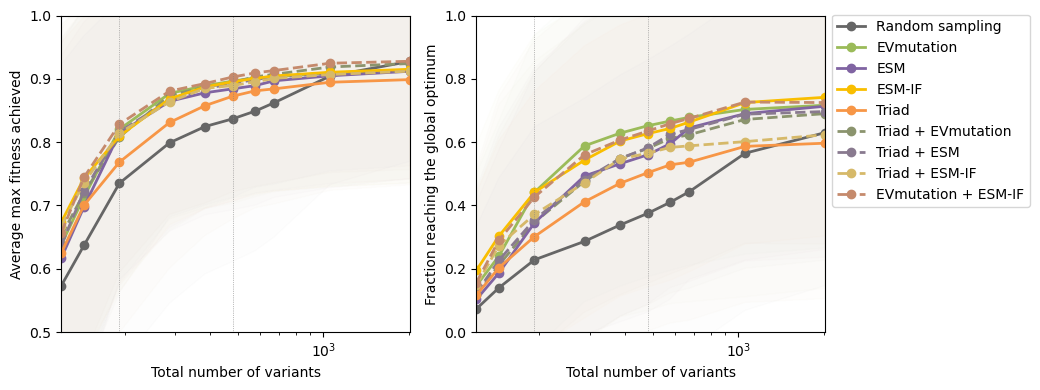

In [178]:
# Define constants
n_top = 96
n_corr = 384

fig, axes = plt.subplots(
    1, 2, figsize=(10.5, 4), sharex=True
)  # Create a 2x2 grid of subplots
mlde_color_list = ["gray", "green", "purple", "yellow", "orange"]

# Define the data and labels for MLDE and ALDE cases
options_dict = {
    "MLDE": [
        "MLDE",
        "ftMLDE: EVmutation",
        "ftMLDE: ESM",
        "ftMLDE: ESM-IF",
        "ftMLDE: Triad",
    ]
}

ensemble_opts = ["Triad + EVmutation", "Triad + ESM", "Triad + ESM-IF", "EVmutation + ESM-IF"]

y_labels = ["Average max fitness achieved", "Fraction reaching the global optimum"]
y_mins = [0.5, 0]

# Loop over both MLDE and ALDE data in the first and second rows respectively
for row, (method, options) in enumerate(options_dict.items()):
    for ax, mlde_metric, y_label, y_min in zip(
        axes, ["top_maxes", "if_truemaxs"], y_labels, y_mins
    ):

        for i, mlde_opts in enumerate(options):
            print(i, mlde_opts)
            mlde_df = avg_mlde_df_dict[mlde_opts]

            ax.plot(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"],
                label=mlde_opts.replace("Average ", ""),
                marker="o",
                # linestyle="dotted",
                linewidth=2,
                color=FZL_PALETTE[
                    mlde_color_list[i % len(mlde_color_list)]
                ],
            )

            ax.fill_between(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
                mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
                color=FZL_PALETTE[mlde_color_list[i % len(mlde_color_list)]],
                alpha=0.01,
            )
            if i > 0:
                print(ensemble_opts[i-1])
                
                # plot the double site same color but different linestyle and marker
                mlde_df = avg_mlde_df_dict[ensemble_opts[i-1]]

                ax.plot(
                    TOTAL_N_LIST,
                    mlde_df[f"{mlde_metric}_mean"],
                    # label=mlde_opts.replace("Average ", ""),
                    marker="o",
                    # markersize=7.5,
                    linestyle="dashed",
                    linewidth=2,
                    color=more_gray_colors[
                        "gray-"+mlde_color_list[i % len(mlde_color_list)]
                    ],
                )

                ax.fill_between(
                    TOTAL_N_LIST,
                    mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
                    mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
                    color=more_gray_colors[
                        "gray-"+mlde_color_list[i % len(mlde_color_list)]],
                    alpha=0.01,
                )

        ax.axvline(n_corr + n_top, color="gray", linewidth=0.5, linestyle="dotted")
        ax.axvline(96 + n_top, color="gray", linewidth=0.5, linestyle="dotted")
        ax.set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
        ax.set_ylim(y_min, 1.0)
        ax.set_xscale("log")
        ax.set_xlabel("Total number of variants")
        ax.set_ylabel(y_label)


# add first legend to be different zs
mlde_color_dict = {
    l.replace("ftMLDE: ", "").replace(
        "MLDE", "Random sampling"
    ): FZL_PALETTE[c]
    for (l, c) in zip(options_dict["MLDE"], mlde_color_list)
}
ds_color_dict = {
    l.replace("ftMLDE: ", "Triad + "
    ): more_gray_colors["gray-"+c] for (l, c) in zip(options_dict["MLDE"][1:-1], mlde_color_list[1:-1])}

ds_color_dict["EVmutation + ESM-IF"] = more_gray_colors["gray-"+mlde_color_list[-1]]
# Create legend for line colors using the color dictionary
color_handles = [
    Line2D([0], [0], color=color, lw=2, label=label, marker = "o")
    for label, color in mlde_color_dict.items()
]

gray_handles = [
    Line2D([0], [0], color=color, lw=2, label=label, marker = "o", linestyle="dashed")
    for label, color in ds_color_dict.items()
]

for h in gray_handles:
    h.set_dashes([6, 2])
# # Add the legends to the figure
axes[1].legend(
    handles=color_handles + gray_handles, loc="upper left", bbox_to_anchor=(1, 1.025)
)


# Adjust the layout to prevent overlapping
plt.tight_layout(h_pad=1.5)
plt.show()
fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s6.svg", dpi=300, bbox_inches="tight", format='svg')

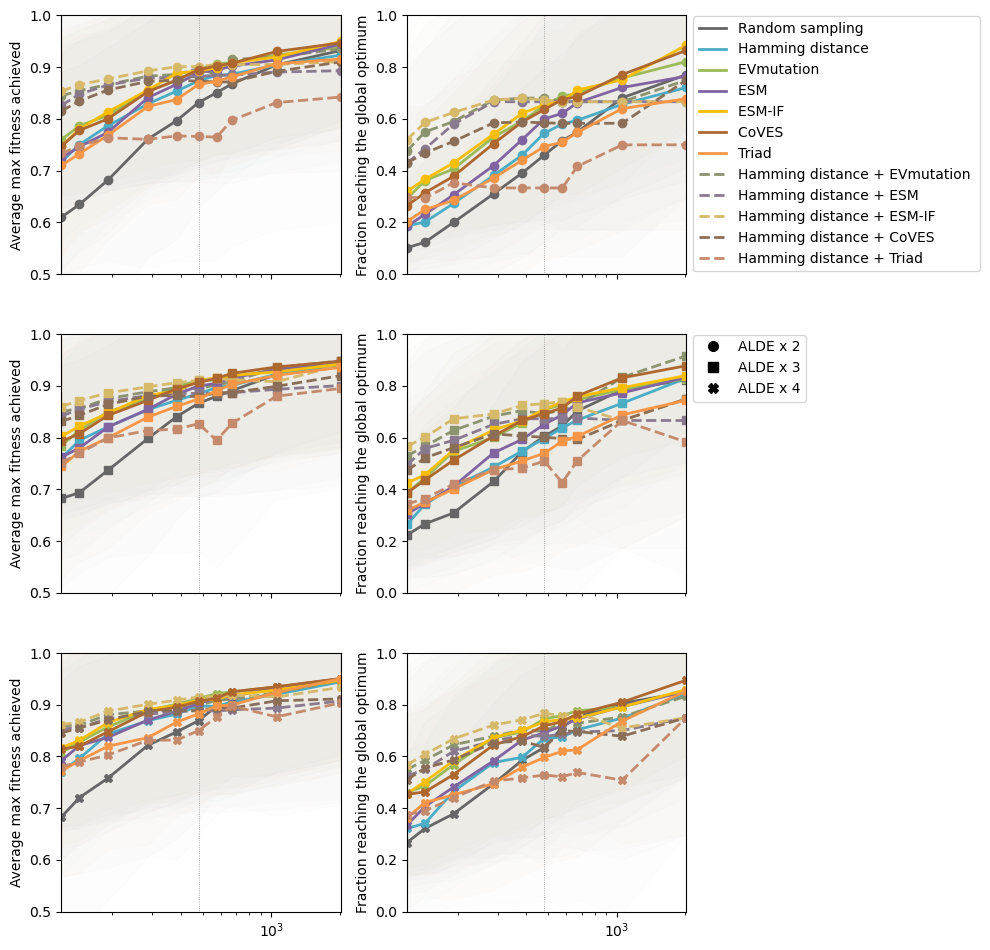

In [177]:
# Define constants
n_top = 96
n_corr = 384

fig, axes = plt.subplots(
    3, 2, figsize=(10, 9.6), sharex=True
)  # Create a 2x2 grid of subplots
mlde_color_list = ["gray", "blue", "green", "purple", "yellow", "brown", "orange"]
n = [2, 3, 4]
# Define the data and labels for MLDE and ALDE cases
opt_list = [""] + [ZS_OPTS_LEGEND[z]+" " for z in ZS_OPTS]

marker_styles = ["o", "s", "X"]

y_labels = ["Average max fitness achieved", "Fraction reaching the global optimum"]
y_mins = [0.5, 0]

# Loop over both MLDE and ALDE data in the first and second rows respectively
for r, row in enumerate(n):
    options = [f"{o}ALDE x {row}" for o in opt_list]

    for m, (mlde_metric, y_label, y_min) in enumerate(zip(
        ["top_maxes", "if_truemaxs"], y_labels, y_mins
    )):
        for i, mlde_opts in enumerate(options):
            mlde_df = avg_mlde_df_dict[mlde_opts]

            axes[r, m].plot(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"],
                label=mlde_opts.replace("Average ", ""),
                marker=marker_styles[r],
                # linestyle="dotted",
                linewidth=2,
                color=FZL_PALETTE[
                    mlde_color_list[i % len(mlde_color_list)]
                ],
            )

            axes[r, m].fill_between(
                TOTAL_N_LIST,
                mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
                mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
                color=FZL_PALETTE[mlde_color_list[i % len(mlde_color_list)]],
                alpha=0.01,
            )
            if i > 1:
                # plot the double site same color but different linestyle and marker
                mlde_df = avg_mlde_df_dict["ds-" + mlde_opts]

                axes[r, m].plot(
                    TOTAL_N_LIST,
                    mlde_df[f"{mlde_metric}_mean"],
                    label=mlde_opts.replace("Average ", ""),
                    marker=marker_styles[r],
                    # markersize=7.5,
                    linestyle="dashed",
                    linewidth=2,
                    color=more_gray_colors[
                        "gray-"+mlde_color_list[i % len(mlde_color_list)]
                    ],
                )

                axes[r, m].fill_between(
                    TOTAL_N_LIST,
                    mlde_df[f"{mlde_metric}_mean"] - mlde_df[f"{mlde_metric}_std"],
                    mlde_df[f"{mlde_metric}_mean"] + mlde_df[f"{mlde_metric}_std"],
                    color=more_gray_colors[
                        "gray-"+mlde_color_list[i % len(mlde_color_list)]],
                    alpha=0.01,
                )

        axes[r, m].axvline(n_corr + n_top, color="gray", linewidth=0.5, linestyle="dotted")
        axes[r, m].set_xlim(TOTAL_N_LIST[0], TOTAL_N_LIST[-1])
        axes[r, m].set_ylim(y_min, 1.0)
        axes[r, m].set_xscale("log")
        if r == 2:
            ax.set_xlabel("Total number of variants")

        axes[r, m].set_ylabel(y_label)

# add first legend to be different zs
mlde_color_dict = {
    (l if l else "Random sampling"): FZL_PALETTE[c]
    for (l, c) in zip(opt_list, mlde_color_list)
}
# Create legend for line colors using the color dictionary
color_handles = [
    Line2D([0], [0], color=color, lw=2, label=label)
    for label, color in mlde_color_dict.items()
]
ds_color_dict = {
    "Hamming distance + " +l.replace(" ALDE x 4", ""): more_gray_colors["gray-"+c] for (l, c) in zip(opt_list[2:], mlde_color_list[2:])}

gray_handles = [
    Line2D([0], [0], color=color, lw=2, label=label, linestyle="dashed")
    for label, color in ds_color_dict.items()
]

marker_style_dict = {f"ALDE x {r}": s for r, s in zip(n, marker_styles)}
# {"ALDE x 2": "o", "ALDE x 3": "s", "ALDE x 4": "X"}

# Create legend for marker styles using the marker dictionary
marker_handles = [
    Line2D(
        [0],
        [0],
        marker=marker,
        color="black",
        linestyle="None",
        markersize=7,
        label=label,
    )
    for label, marker in marker_style_dict.items()
]

# Add the legends to the figure
axes[0, 1].legend(
    handles=color_handles + gray_handles, loc="upper left", bbox_to_anchor=(1, 1.025)
)
axes[1, 1].legend(handles=marker_handles, loc="upper left", bbox_to_anchor=(1, 1.025))

# Adjust the layout to prevent overlapping
plt.tight_layout()
plt.show()
fig.savefig("/disk2/fli/SSMuLA/sandbox/fig_svg/fig_s2.svg", dpi=300, bbox_inches="tight", format='svg')
